<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/04RetiNeurali/01ReteSemplice/mnist_keras01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST in Keras
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
from random import randint

import matplotlib.pyplot as plt
import numpy
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.utils import np_utils

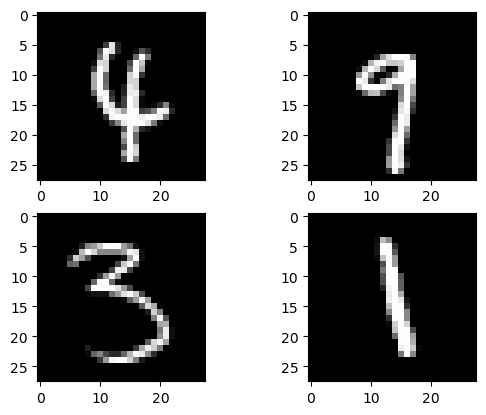

In [2]:
# ottengo il dataset MNIST già suddiviso in dataset X e Y, di addestramento e di test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# visualizzo 4 cifre random
for i in range(4):
    plt.subplot(2, 2, (i + 1))
    # in 'shape[0]' è contenuto il numero di esempi del dataset (in questo caso di addestramento)
    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap=plt.get_cmap('gray'))

In [3]:
# imposto un seed random in modo da ottenere risultati replicabili, d'ora in avanti
numpy.random.seed(1234)

# modifico le matrici di pixel in modo da ottenere un vettore di pixel monodimensionale per ogni cifra
# in 'shape[1]' e 'shape[2]' è contenuto le dimensioni in pixel (rispettivamente y ed x)
num_pixel = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixel).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixel).astype('float32')

# normalizzo i valori dei pixel portandoli dal range intero 0-255 al range in virgola mobile 0.0-1.0
# visto che sono array numpy, è sufficiente eseguire l'operazione direttamente sull'array
X_train = X_train / 255
X_test = X_test / 255

# modifico gli array dei risultati ("ground truth") in modo siano in formato 'one hot encode'
# quindi i valori interi corrispondenti alla classe della cifra (0, 1, 2, ..., 9) vengono
# codificati in stringhe posizionali di 0 ed 1
# esempi:
#   0 --> 1,0,0,0,0,0,0,0,0,0
#   1 --> 0,1,0,0,0,0,0,0,0,0
#   2 --> 0,0,1,0,0,0,0,0,0,0
#  ....
#   9 --> 0,0,0,0,0,0,0,0,0,1
# in questo modo è più semplice ottenere un risultato significativo dalla rete neurale, in quanto
# ogni cifra posizionale corrisponderà ad un neurone dello strato di output che si attiverà o meno
# a seconda del risultato della classificazione della rete neurale
# in 'shape[0]' continuerà ad essere contenuto il numero di cifre del dataset
# in 'shape[1]' ci sarà invece il numero di cifre posizionali, corrispondente al numero di classi possibili
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classi = y_train.shape[1]

In [4]:
# definisco un modello di rete neurale
# come dimensione del layer di ingresso uso quelle del train set (esclusa la dimensione iniziale del numero di cifre del dataset)
input_layer = Input(shape=X_train.shape[1:], name="input_layer")
inner_layer = Dense(num_pixel, name="inner_layer")(input_layer)
output_layer = Dense(num_classi, activation="softmax", name="output_layer")(inner_layer)

model = Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
inner_layer (Dense)          (None, 784)               615440    
_________________________________________________________________
output_layer (Dense)         (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


2022-12-19 09:02:27.047124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:02:27.052058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:02:27.052212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:02:27.052796: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:

# compilo il modello indicando che tipo di loss_function devo utilizzare,
# il tipo di ottimizzatore e le metriche che voglio vengano calcolate
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# addestro il modello
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=256, verbose=1)

2022-12-19 09:02:28.369626: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3778 - accuracy: 0.8914 - val_loss: 0.2939 - val_accuracy: 0.9144
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.9168 - val_loss: 0.2886 - val_accuracy: 0.9212
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.9220 - val_loss: 0.2820 - val_accuracy: 0.9211
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.9221 - val_loss: 0.2784 - val_accuracy: 0.9224
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9250 - val_loss: 0.2895 - val_accuracy: 0.9191
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.9244 - val_loss: 0.2864 - val_accuracy: 0.9193
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2652 - accuracy: 0.9261 - val_loss: 0.2976 - val_accuracy: 0.9174
Epoch 

In [6]:
# valuto il modello
valutazioni = model.evaluate(X_test, y_test, verbose=1)
print("Errore del modello: {:.2f}%".format(100 - valutazioni[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.9217
Errore del modello: 7.83%
